In [7]:
%cd /home/wallarelvo/Projects/proctr/
%matplotlib inline

/home/wallarelvo/Projects/proctr


In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Loads Data

In [9]:
days = list()
max_p = 0
for i in xrange(7):
    df = pd.read_csv(
        "data/rates-{}.csv".format(i),
        names=["time", "rate", "pdf"],
        parse_dates=["time"],
        infer_datetime_format=True)
    df_max_p = df["pdf"].max()
    if df_max_p > max_p:
        max_p = df_max_p
    days.append(df)

# Plots Rates

In [10]:
def plot_rate_dist(df, ax, title):
    n_dates = 6 * 24
    n_rates = 100
    x = np.resize(df["time"], (n_dates, n_rates))
    y = np.resize(df["rate"], (n_dates, n_rates))
    z = np.resize(df["pdf"], (n_dates, n_rates))
    g = ax.contourf(x, y, z, cmap="BuPu", vmin=0, vmax=max_p)
    #ax.set_xlabel("Time")
    ax.set_ylabel("Rate")
    xticklabels = list()
    ax.set_xticklabels(["00", "03", "06", "09", "12", "15", "18", "21"])
    ax.set_title(title)
    return g

# Rate Distributions

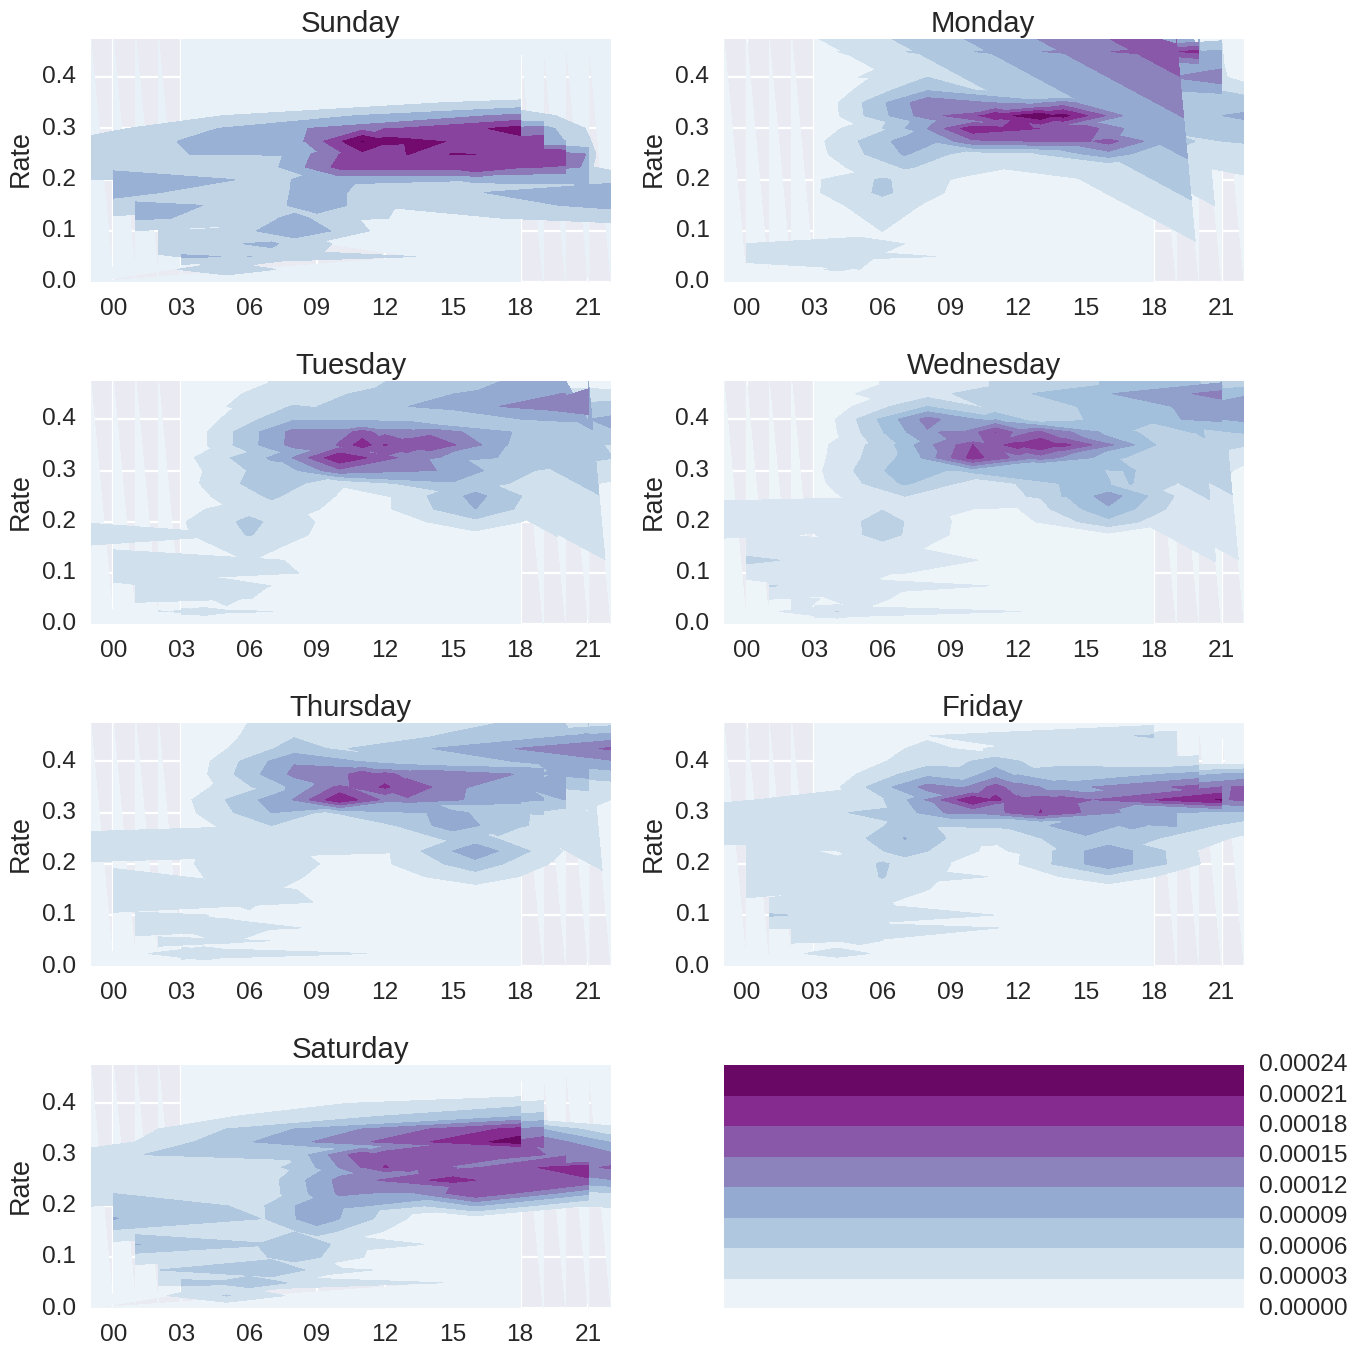

In [11]:
sns.set_context("poster", font_scale=1.1)
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()
weekdays = ["Sunday", "Monday", "Tuesday",
            "Wednesday", "Thursday", "Friday", "Saturday"]
for i in xrange(7):
    g = plot_rate_dist(days[i], axes[i], weekdays[i])
plt.colorbar(g, cax=axes[-1])
plt.tight_layout()